#### Note: 20221212
- sensor會重複寫入無法校正
    - 直接使用

- 篩除掉sensor NaN、mismatch後的資料直接使用

In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
# import feather
import matplotlib.pyplot as plt
%matplotlib inline

print(np.__version__)
print(pd.__version__)
dir_data = Path('data/preprocessed_CH')

1.22.3
1.5.2


In [6]:
!pwd
# !ls -l
!ls -lR data/

/mnt/c/Users/yunghui/Documents/DORA
data/:
total 1514640
-rwxrwxrwx 1 yunghui yunghui 1550988456 Nov 18 10:45 cars.7z
drwxrwxrwx 1 yunghui yunghui        512 Dec  8 16:41 preprocessed_Andy
drwxrwxrwx 1 yunghui yunghui        512 Dec  8 16:37 preprocessed_CH

data/preprocessed_Andy:
total 6420
-rwxrwxrwx 1 yunghui yunghui 6573925 Dec  7 15:05 HR55AD8921_Target.csv

data/preprocessed_CH:
total 14136
-rwxrwxrwx 1 yunghui yunghui  323994 Dec  6 13:33 df_event_KA01AF2992.feather
-rwxrwxrwx 1 yunghui yunghui 1354946 Dec  6 13:33 df_event_KA01AF482.feather
-rwxrwxrwx 1 yunghui yunghui  557290 Dec  1 16:00 df_event_KA04MW6569.feather
-rwxrwxrwx 1 yunghui yunghui 2166618 Dec  1 16:00 df_event_KA51AG8742.feather
-rwxrwxrwx 1 yunghui yunghui  615970 Dec  6 13:33 df_event_MH04KF8187.feather
-rwxrwxrwx 1 yunghui yunghui  307386 Dec  5 16:23 df_event_agg_KA01AF2992.feather
-rwxrwxrwx 1 yunghui yunghui 1245690 Dec  5 16:23 df_event_agg_KA01AF482.feather
-rwxrwxrwx 1 yunghui yunghui  489906 Dec  5 16:

## Data Explore with CH's preprocessed data

### Check out the data profiles

##### Load data after filter Fierce behavior event 

In [9]:
# # Load files
# path_event_DORA = [path for path in list(dir_data.glob('*'))
#              if path.suffix in ['.csv', '.feather'] 
#              and 'all' not in path.name
#              and 'agg' not in path.name
#              ]
# path_event_DORA

[PosixPath('data/preprocessed_CH/df_event_KA01AF2992.feather'),
 PosixPath('data/preprocessed_CH/df_event_KA01AF482.feather'),
 PosixPath('data/preprocessed_CH/df_event_KA04MW6569.feather'),
 PosixPath('data/preprocessed_CH/df_event_KA51AG8742.feather'),
 PosixPath('data/preprocessed_CH/df_event_MH04KF8187.feather')]

In [27]:
# # Load data after filter Fierce behavior event 
# df_event = pd.concat([pd.read_feather(path_) for path_ in path_event_DORA]).reset_index(drop=True)
# print(df_event.columns)
# df_event.info()
# df_event.head(3)

Index(['id', 'vehicle_id', 'latitude', 'longitude', 'speed', 'heading',
       'timestamp', 'gsen_timeTick', 'gyro_timeTick', 'gsen_X', 'gyro_X',
       'gsen_Y', 'gyro_Y', 'gsen_Z', 'gyro_Z', 'timestamp_conv', 'event_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20504 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20504 non-null  int64         
 1   vehicle_id      20504 non-null  object        
 2   latitude        20504 non-null  float64       
 3   longitude       20504 non-null  float64       
 4   speed           20504 non-null  float64       
 5   heading         20504 non-null  float64       
 6   timestamp       20504 non-null  int64         
 7   gsen_timeTick   20504 non-null  object        
 8   gyro_timeTick   20504 non-null  object        
 9   gsen_X          20504 non-null  object        
 10  gyro_X          

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,"[5458092, 5458294, 5458492, 5458692, 5458893]","[5458091, 5458294, 5458492, 5458692, 5458892]","[-0.1768442541360855, -0.3292020559310913, -0....","[0.0027008056640625, -0.009552001953125, -0.01...","[0.35891878604888916, 0.359760046005249, 0.359...","[-0.0084075927734375, -0.026397705078125, -0.0...","[0.4236612319946289, 0.5882062911987305, 0.645...","[0.024566650390625, 0.02606201171875, 0.024032...",2022-07-27 06:04:39.193,1
1,39079364,KA01AF2992,13.094095,77.594323,4.052998,184.984238,1658901880193,"[5459092, 5459293, 5459494, 5459693, 5459893]","[5459092, 5459292, 5459493, 5459693, 5459892]","[-0.3817916512489319, 0.030077725648880005, 0....","[-0.0150909423828125, 0.01611328125, 0.0014190...","[0.303417444229126, -0.0026443004608154297, 0....","[-0.0308685302734375, 0.019500732421875, 0.033...","[0.7125339508056641, -1.2284603118896484, -0.1...","[0.0198822021484375, 0.017852783203125, 0.0147...",2022-07-27 06:04:40.193,1
2,39079620,KA01AF2992,13.086250,77.593758,7.070510,185.000580,1658901973438,"[5549111, 5549312, 5549512, 5549712, 5549911]","[5549111, 5549312, 5549512, 5549712, 5549911]","[0.42737051844596863, 0.10562610626220703, -0....","[0.0118560791015625, -0.0209503173828125, -0.0...","[-0.038906097412109375, 0.31329238414764404, 0...","[-0.0077667236328125, -0.0175628662109375, -0....","[-1.6793060302734375, -0.3619565963745117, 3.1...","[0.0094451904296875, 0.0131683349609375, 0.010...",2022-07-27 06:06:13.438,2


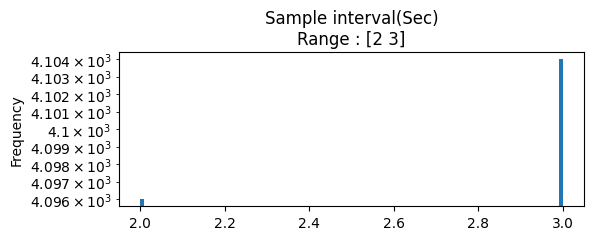

In [205]:
# figsize =(6, 2)
# df_event_sec = df_event.groupby(['vehicle_id', 'event_id']).id.count()
# # df_event_sec.plot.hist(figsize=figsize, title='Sample interval : second');
# s_interval = np.sort(df_event_sec.unique())
# title = f'Sample interval(Sec)'
# title += f'\nRange : {s_interval}'
# df_event_sec.plot.hist(figsize=figsize, bins=100, title=title, logy=True);

# print()

##### Load data after aggregate

In [12]:
# # Load files
# path_event_agg_DORA = [path for path in list(dir_data.glob('*'))
#              if path.suffix in ['.csv', '.feather'] 
#              and 'agg' in path.name
#              ]
# path_event_agg_DORA

[PosixPath('data/preprocessed_CH/df_event_agg_KA01AF2992.feather'),
 PosixPath('data/preprocessed_CH/df_event_agg_KA01AF482.feather'),
 PosixPath('data/preprocessed_CH/df_event_agg_KA04MW6569.feather'),
 PosixPath('data/preprocessed_CH/df_event_agg_KA51AG8742.feather'),
 PosixPath('data/preprocessed_CH/df_event_agg_MH04KF8187.feather')]

In [185]:
# # Load data after aggregate
# figsize=(6,2)
# df_agg = pd.concat([pd.read_feather(path_) for path_ in path_event_agg_DORA]).reset_index(drop=True)
# print(df_agg.columns)
# # df_agg.info()
# df_agg.head(3)


Index(['event_id', 'gsen_X', 'gsen_Y', 'gsen_Z', 'gyro_X', 'gyro_Y', 'gyro_Z',
       'lat_std', 'long_std', 'speed_mean', 'speed_std', 'vehicle_id',
       'gsen_X_mean', 'gsen_X_std', 'gsen_X_max', 'gsen_X_min', 'gsen_X_range',
       'gyro_X_mean', 'gyro_X_std', 'gyro_X_max', 'gyro_X_min', 'gyro_X_range',
       'gsen_Y_mean', 'gsen_Y_std', 'gsen_Y_max', 'gsen_Y_min', 'gsen_Y_range',
       'gyro_Y_mean', 'gyro_Y_std', 'gyro_Y_max', 'gyro_Y_min', 'gyro_Y_range',
       'gsen_Z_mean', 'gsen_Z_std', 'gsen_Z_max', 'gsen_Z_min', 'gsen_Z_range',
       'gyro_Z_mean', 'gyro_Z_std', 'gyro_Z_max', 'gyro_Z_min', 'gyro_Z_range',
       'lat_mean', 'long_mean'],
      dtype='object')


,event_id,gsen_X,gsen_Y,gsen_Z,gyro_X,gyro_Y,gyro_Z,lat_std,long_std,speed_mean,...,gsen_Z_max,gsen_Z_min,gsen_Z_range,gyro_Z_mean,gyro_Z_std,gyro_Z_max,gyro_Z_min,gyro_Z_range,lat_mean,long_mean
0,1,"[-0.1768442541360855, -0.3292020559310913, -0....","[0.35891878604888916, 0.359760046005249, 0.359...","[0.4236612319946289, 0.5882062911987305, 0.645...","[0.0027008056640625, -0.009552001953125, -0.01...","[-0.0084075927734375, -0.026397705078125, -0.0...","[0.024566650390625, 0.02606201171875, 0.024032...",0.000020,0.000002,4.221517,...,5.481957,-2.476293,7.958250,0.020793,0.003755,0.026062,0.014755,0.011307,NaN,NaN
1,2,"[0.42737051844596863, 0.10562610626220703, -0....","[-0.038906097412109375, 0.31329238414764404, 0...","[-1.6793060302734375, -0.3619565963745117, 3.1...","[0.0118560791015625, -0.0209503173828125, -0.0...","[-0.0077667236328125, -0.0175628662109375, -0....","[0.0094451904296875, 0.0131683349609375, 0.010...",0.000052,0.000005,7.078683,...,3.184722,-2.618477,5.803199,0.014061,0.003872,0.022751,0.009445,0.013306,NaN,NaN
2,3,"[0.09482461214065552, 0.15548771619796753, 0.2...","[0.024686694145202637, 0.18659746646881104, 0....","[-0.0026922225952148438, -0.14077472686767578,...","[0.01654052734375, -0.005401611328125, -0.0039...","[-0.0142669677734375, -0.0097808837890625, 0.0...","[0.00848388671875, 0.0093231201171875, 0.01338...",0.000042,0.000004,9.010814,...,3.178970,-2.633689,5.812659,0.017439,0.006221,0.030319,0.008484,0.021835,NaN,NaN


In [187]:
# df_agg.groupby(['vehicle_id']).event_id.unique()

vehicle_id
KA01AF2992    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA01AF482     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA04MW6569    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA51AG8742    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
MH04KF8187    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: event_id, dtype: object

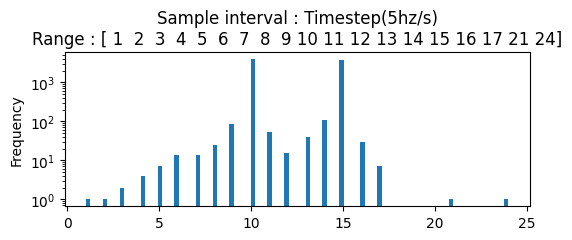

In [204]:
# df_agg_timestep = df_agg.gsen_X.apply(lambda df_: len(df_))
# s_interval = np.sort(df_agg_timestep.unique())
# title = f'Sample interval : Timestep(5hz/s)'
# title += f'\nRange : {s_interval}'
# df_agg_timestep.plot.hist(figsize=figsize, bins=100, title=title, logy=True);

##### note
- timestep btw 8-17
    - maybe have enough information 
- is evenly distributed?
    - If the data sampling point is continuous, it will not affect the feature of the data itself.

### Check Missing datalog and timesteps

##### Load All event data

In [2]:
# Load files

file_ = 'df_event_all_v1'

# dir_DORA = Path('DORA')
# path_DORA = [path for path in list(dir_DORA.glob('*'))
#              if path.suffix in ['.csv', '.feather']  
#              and 'all' not in path.name
#              and 'agg' not in path.name
#              ]
# path_DORA
# df_event = pd.concat([pd.read_feather(path_) for path_ in path_DORA]).reset_index(drop=True)

# df_event.to_feather(dir_DORA/f'{file_}.feather')

In [9]:
df_event = pd.read_feather(dir_data/f'{file_}.feather')

print(df_event.columns)
df_event.info()
df_event.head()

Index(['id', 'vehicle_id', 'latitude', 'longitude', 'speed', 'heading',
       'timestamp', 'gsen_timeTick', 'gyro_timeTick', 'gsen_X', 'gyro_X',
       'gsen_Y', 'gyro_Y', 'gsen_Z', 'gyro_Z', 'timestamp_conv', 'event_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20504 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20504 non-null  int64         
 1   vehicle_id      20504 non-null  object        
 2   latitude        20504 non-null  float64       
 3   longitude       20504 non-null  float64       
 4   speed           20504 non-null  float64       
 5   heading         20504 non-null  float64       
 6   timestamp       20504 non-null  int64         
 7   gsen_timeTick   20504 non-null  object        
 8   gyro_timeTick   20504 non-null  object        
 9   gsen_X          20504 non-null  object        
 10  gyro_X          

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,"[5458092, 5458294, 5458492, 5458692, 5458893]","[5458091, 5458294, 5458492, 5458692, 5458892]","[-0.1768442541360855, -0.3292020559310913, -0....","[0.0027008056640625, -0.009552001953125, -0.01...","[0.35891878604888916, 0.359760046005249, 0.359...","[-0.0084075927734375, -0.026397705078125, -0.0...","[0.4236612319946289, 0.5882062911987305, 0.645...","[0.024566650390625, 0.02606201171875, 0.024032...",2022-07-27 06:04:39.193,1
1,39079364,KA01AF2992,13.094095,77.594323,4.052998,184.984238,1658901880193,"[5459092, 5459293, 5459494, 5459693, 5459893]","[5459092, 5459292, 5459493, 5459693, 5459892]","[-0.3817916512489319, 0.030077725648880005, 0....","[-0.0150909423828125, 0.01611328125, 0.0014190...","[0.303417444229126, -0.0026443004608154297, 0....","[-0.0308685302734375, 0.019500732421875, 0.033...","[0.7125339508056641, -1.2284603118896484, -0.1...","[0.0198822021484375, 0.017852783203125, 0.0147...",2022-07-27 06:04:40.193,1
2,39079620,KA01AF2992,13.086250,77.593758,7.070510,185.000580,1658901973438,"[5549111, 5549312, 5549512, 5549712, 5549911]","[5549111, 5549312, 5549512, 5549712, 5549911]","[0.42737051844596863, 0.10562610626220703, -0....","[0.0118560791015625, -0.0209503173828125, -0.0...","[-0.038906097412109375, 0.31329238414764404, 0...","[-0.0077667236328125, -0.0175628662109375, -0....","[-1.6793060302734375, -0.3619565963745117, 3.1...","[0.0094451904296875, 0.0131683349609375, 0.010...",2022-07-27 06:06:13.438,2
3,39079621,KA01AF2992,13.086186,77.593752,7.032840,184.999451,1658901973438,"[5550509, 5550512, 5550712, 5550912]","[5550509, 5550512, 5550712, 5550912]","[0.2674969732761383, 0.2073156237602234, -0.07...","[0.0033416748046875, 0.0077056884765625, -0.01...","[0.18249452114105225, 0.09992015361785889, -0....","[0.055084228515625, 0.04156494140625, -0.04782...","[-0.8850908279418945, -0.5479907989501953, 0.4...","[0.01507568359375, 0.0162506103515625, 0.01370...",2022-07-27 06:06:13.438,2
4,39079622,KA01AF2992,13.086123,77.593746,7.132697,185.001999,1658901973438,"[5551115, 5551312, 5551512, 5551712, 5551912]","[5551115, 5551312, 5551512, 5551712, 5551912]","[0.1853664219379425, 0.1695137917995453, 0.095...","[0.003326416015625, -0.005828857421875, -0.000...","[0.12484514713287354, 0.06923925876617432, -0....","[-0.00244140625, -0.0056304931640625, -0.00755...","[-0.14698505401611328, 0.18669414520263672, -0...","[0.012847900390625, 0.014434814453125, 0.01103...",2022-07-27 06:06:13.438,2


In [10]:
# Check whether the "event_id" field of each vehicle is unique
df_event.groupby(['vehicle_id']).event_id.unique()

# Each vehicle has its own event_id

vehicle_id
KA01AF2992    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA01AF482     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA04MW6569    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA51AG8742    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
MH04KF8187    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: event_id, dtype: object

<!-- <table><tr><td bgcolor=darkblue> Should "speed" be included as a feature? </td></tr></table> -->
##### <font color=lightgreen size=6> Should "speed" be included as a feature? </font>


#### Count Missing data dist.

In [11]:
col_gsen = ['gsen_X', 'gsen_Y', 'gsen_Z']
col_gyro = ['gyro_X', 'gyro_Y', 'gyro_Z']
col_index = ['event_id', 'timestamp']


In [12]:
# find out missing sensor data 
mask_sensor_missing = df_event.gsen_timeTick.apply(lambda x: len(x))==0
idx_sensor_missing = df_event[mask_sensor_missing].index.values
df_event[mask_sensor_missing].head()

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
2864,45794708,KA01AF482,13.218784,77.974100,16.275145,330.007965,1661333344287,[],[],[],[],[],[],[],[],2022-08-24 09:29:04.287,723
2964,45934968,KA01AF482,13.201758,77.997731,20.164141,121.927315,1661383264974,[],[],[],[],[],[],[],[],2022-08-24 23:21:04.974,764
3025,45941498,KA01AF482,13.112760,77.989698,8.755254,45.999386,1661385655854,[],[],[],[],[],[],[],[],2022-08-25 00:00:55.854,790
3085,45963066,KA01AF482,12.940225,78.259923,3.383906,80.038651,1661393258865,[],[],[],[],[],[],[],[],2022-08-25 02:07:38.865,818
3256,46147061,KA01AF482,12.957031,78.271498,8.258431,345.018951,1661450888095,[],[],[],[],[],[],[],[],2022-08-25 18:08:08.095,892


##### Identify abnormal data
- timeTick missing 
- timeTick mismatch 

In [13]:
# Findout timeTick missing and mismatch data
df_gsen_t = df_event.gsen_timeTick.apply(lambda x: len(x))
df_gyro_t = df_event.gyro_timeTick.apply(lambda x: len(x))

df_timeTick = pd.concat([df_gsen_t, df_gyro_t], axis=1)
df_timeTick.head()


,gsen_timeTick,gyro_timeTick
0,5,5
1,5,5
2,5,5
3,4,4
4,5,5


In [14]:

# df_timeTick_abnormal = df_timeTick.query('gsen_timeTick==0 | gyro_timeTick==0 | gsen_timeTick != gyro_timeTick')

idx_t_missing = df_timeTick.query('gsen_timeTick==0 | gyro_timeTick==0').index.values
idx_t_mismatch = df_timeTick.query('gsen_timeTick != gyro_timeTick').index.values
inter_ = set(idx_t_missing) & set(idx_t_mismatch)

print(f'TimeTick missing : \t\t{len(idx_t_missing):>3d}')
print(f'TimeTick mismatch : \t\t{len(idx_t_mismatch):>3d}')
print(f'TimeTick missing & mismatch : \t{len(inter_):>3d}')
print('-'*130)
print(df_timeTick.loc[idx_t_missing][::12])
print(df_timeTick.loc[idx_t_mismatch].head(5))
df_event.iloc[list(inter_)]

# TimeTick missing : 60
# TimeTick mismatch : 180
# TimeTick missing & mismatch : 2

TimeTick missing : 		 60
TimeTick mismatch : 		180
TimeTick missing & mismatch : 	  2
----------------------------------------------------------------------------------------------------------------------------------
       gsen_timeTick  gyro_timeTick
2864               0              0
4233               0              0
6300               0              0
8607               0              0
13312              0              0
      gsen_timeTick  gyro_timeTick
747               5              6
748               6              5
750               6              5
1544              7              6
1573              6              5


,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
12375,31321237,KA51AG8742,13.110674,77.987114,4.739337,189.081512,1653119179000,[],"[77476109, 77476310, 77476509, 77476708, 77476...",[],"[0.0068206787109375, 0.0287628173828125, -0.00...",[],"[-0.03955078125, 0.024139404296875, 0.05503845...",[],"[0.0037994384765625, 0.006134033203125, 0.0057...",2022-05-21 07:46:19.000,1214
6303,56521548,KA01AF482,12.990292,78.206492,19.885721,77.997543,1664675817588,"[41905122, 41905319]",[],"[0.029389619827270508, 0.7395737767219543]",[],"[-0.7267400026321411, -0.5777555108070374]",[],"[-0.23696613311767578, 3.072925567626953]",[],2022-10-02 01:56:57.588,2275


In [22]:
(df_event.loc[idx_t_mismatch, ['gsen_timeTick','gyro_timeTick']]
 .iloc[:3].values
)

# Time mismatch format inconsistency. 
# Head misalignment, tail misalignment

array([[array([214952014, 214952191, 214952390, 214952591, 214952791]),
        array([214952014, 214952191, 214952390, 214952590, 214952790, 214952995])],
       [array([214953011, 214953191, 214953393, 214953591, 214953791, 214953991]),
        array([214953190, 214953391, 214953591, 214953791, 214953991])],
       [array([214953011, 214953191, 214953393, 214953591, 214953791, 214953991]),
        array([214953190, 214953391, 214953591, 214953791, 214953991])]],
      dtype=object)

##### data Time Series Misalignment
- Time mismatch format inconsistency. 
    - Head misalignment
    - Tail misalignment

- Solution:
    - Delete
    - ~~Alignment~~
        - Execution difficulties ： TimeTick btw gsen and gyro is inconsist

#### <font color=lightgreen > Drop Data with timestep mismatch and missing </font>
- by idx
- get reseverd id

In [15]:
print(f'Data All : {len(df_event.index.values):>6,d}')
idx_drop = set(idx_t_missing) | set(idx_t_mismatch)
# idx_drop.sort()
print(f'Data that will be dropped  : {len(idx_drop):>6,d}')

idx_reserved = list(set(df_event.index.values) - idx_drop) 
print(f'Data that will be retained : {len(idx_reserved):>6,d}')

# Data All : 20,504
# Data that will be dropped  :    238
# Data that will be retained : 20,266

df_event.iloc[idx_reserved].head()


Data All : 20,504
Data that will be dropped  :    238
Data that will be retained : 20,266


,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,"[5458092, 5458294, 5458492, 5458692, 5458893]","[5458091, 5458294, 5458492, 5458692, 5458892]","[-0.1768442541360855, -0.3292020559310913, -0....","[0.0027008056640625, -0.009552001953125, -0.01...","[0.35891878604888916, 0.359760046005249, 0.359...","[-0.0084075927734375, -0.026397705078125, -0.0...","[0.4236612319946289, 0.5882062911987305, 0.645...","[0.024566650390625, 0.02606201171875, 0.024032...",2022-07-27 06:04:39.193,1
1,39079364,KA01AF2992,13.094095,77.594323,4.052998,184.984238,1658901880193,"[5459092, 5459293, 5459494, 5459693, 5459893]","[5459092, 5459292, 5459493, 5459693, 5459892]","[-0.3817916512489319, 0.030077725648880005, 0....","[-0.0150909423828125, 0.01611328125, 0.0014190...","[0.303417444229126, -0.0026443004608154297, 0....","[-0.0308685302734375, 0.019500732421875, 0.033...","[0.7125339508056641, -1.2284603118896484, -0.1...","[0.0198822021484375, 0.017852783203125, 0.0147...",2022-07-27 06:04:40.193,1
2,39079620,KA01AF2992,13.086250,77.593758,7.070510,185.000580,1658901973438,"[5549111, 5549312, 5549512, 5549712, 5549911]","[5549111, 5549312, 5549512, 5549712, 5549911]","[0.42737051844596863, 0.10562610626220703, -0....","[0.0118560791015625, -0.0209503173828125, -0.0...","[-0.038906097412109375, 0.31329238414764404, 0...","[-0.0077667236328125, -0.0175628662109375, -0....","[-1.6793060302734375, -0.3619565963745117, 3.1...","[0.0094451904296875, 0.0131683349609375, 0.010...",2022-07-27 06:06:13.438,2
3,39079621,KA01AF2992,13.086186,77.593752,7.032840,184.999451,1658901973438,"[5550509, 5550512, 5550712, 5550912]","[5550509, 5550512, 5550712, 5550912]","[0.2674969732761383, 0.2073156237602234, -0.07...","[0.0033416748046875, 0.0077056884765625, -0.01...","[0.18249452114105225, 0.09992015361785889, -0....","[0.055084228515625, 0.04156494140625, -0.04782...","[-0.8850908279418945, -0.5479907989501953, 0.4...","[0.01507568359375, 0.0162506103515625, 0.01370...",2022-07-27 06:06:13.438,2
4,39079622,KA01AF2992,13.086123,77.593746,7.132697,185.001999,1658901973438,"[5551115, 5551312, 5551512, 5551712, 5551912]","[5551115, 5551312, 5551512, 5551712, 5551912]","[0.1853664219379425, 0.1695137917995453, 0.095...","[0.003326416015625, -0.005828857421875, -0.000...","[0.12484514713287354, 0.06923925876617432, -0....","[-0.00244140625, -0.0056304931640625, -0.00755...","[-0.14698505401611328, 0.18669414520263672, -0...","[0.012847900390625, 0.014434814453125, 0.01103...",2022-07-27 06:06:13.438,2


### Explode sensor data frome list format

In [17]:
df_sensor_exploded = df_event.iloc[idx_reserved].apply(pd.Series.explode)
df_sensor_exploded.info()
df_sensor_exploded 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100958 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              100958 non-null  int64         
 1   vehicle_id      100958 non-null  object        
 2   latitude        100958 non-null  float64       
 3   longitude       100958 non-null  float64       
 4   speed           100958 non-null  float64       
 5   heading         100958 non-null  float64       
 6   timestamp       100958 non-null  int64         
 7   gsen_timeTick   100958 non-null  object        
 8   gyro_timeTick   100958 non-null  object        
 9   gsen_X          100958 non-null  object        
 10  gyro_X          100958 non-null  object        
 11  gsen_Y          100958 non-null  object        
 12  gyro_Y          100958 non-null  object        
 13  gsen_Z          100958 non-null  object        
 14  gyro_Z          100958 non-null  obje

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458092,5458091,-0.176844,0.002701,0.358919,-0.008408,0.423661,0.024567,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458294,5458294,-0.329202,-0.009552,0.35976,-0.026398,0.588206,0.026062,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458492,5458492,-0.477587,-0.01712,0.359269,-0.044296,0.645035,0.024033,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458692,5458692,0.128577,0.012604,0.172681,0.0112,-2.081446,0.024353,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458893,5458892,-0.198447,-0.003693,0.187229,0.012802,0.825244,0.021576,2022-07-27 06:04:39.193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565018,27565017,2.91445,-0.035446,-1.703996,0.013611,0.351263,0.028122,2022-10-03 01:10:55.906,1097
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565217,27565216,-2.949032,-0.027237,0.460132,0.004761,-2.437326,0.020874,2022-10-03 01:10:55.906,1097
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565416,27565416,1.892698,-0.003052,0.242738,-0.002045,-0.230687,-0.032181,2022-10-03 01:10:55.906,1097
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565617,27565617,-0.870719,-0.003052,0.033652,0.018936,-1.473144,-0.014069,2022-10-03 01:10:55.906,1097


In [19]:
df_sensor_exploded = df_event.iloc[idx_reserved].apply(pd.Series.explode)
col_sensor = df_sensor_exploded.filter(regex='[XYZ]$').columns.values # ['gsen_X', 'gyro_X', 'gsen_Y', 'gyro_Y', 'gsen_Z', 'gyro_Z']
col_sensorTimeTick = df_sensor_exploded.filter(regex='Tick$').columns.values # ['gsen_timeTick', 'gyro_timeTick']
df_sensor_exploded[col_sensor] = df_sensor_exploded[col_sensor].astype(float) 
df_sensor_exploded[col_sensorTimeTick] = df_sensor_exploded[col_sensorTimeTick].astype(int) 

df_sensor_exploded.info()
df_sensor_exploded 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100958 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              100958 non-null  int64         
 1   vehicle_id      100958 non-null  object        
 2   latitude        100958 non-null  float64       
 3   longitude       100958 non-null  float64       
 4   speed           100958 non-null  float64       
 5   heading         100958 non-null  float64       
 6   timestamp       100958 non-null  int64         
 7   gsen_timeTick   100958 non-null  int64         
 8   gyro_timeTick   100958 non-null  int64         
 9   gsen_X          100958 non-null  float64       
 10  gyro_X          100958 non-null  float64       
 11  gsen_Y          100958 non-null  float64       
 12  gyro_Y          100958 non-null  float64       
 13  gsen_Z          100958 non-null  float64       
 14  gyro_Z          100958 non-null  floa

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458092,5458091,-0.176844,0.002701,0.358919,-0.008408,0.423661,0.024567,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458294,5458294,-0.329202,-0.009552,0.359760,-0.026398,0.588206,0.026062,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458492,5458492,-0.477587,-0.017120,0.359269,-0.044296,0.645035,0.024033,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458692,5458692,0.128577,0.012604,0.172681,0.011200,-2.081446,0.024353,2022-07-27 06:04:39.193,1
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,5458893,5458892,-0.198447,-0.003693,0.187229,0.012802,0.825244,0.021576,2022-07-27 06:04:39.193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565018,27565017,2.914450,-0.035446,-1.703996,0.013611,0.351263,0.028122,2022-10-03 01:10:55.906,1097
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565217,27565216,-2.949032,-0.027237,0.460132,0.004761,-2.437326,0.020874,2022-10-03 01:10:55.906,1097
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565416,27565416,1.892698,-0.003052,0.242738,-0.002045,-0.230687,-0.032181,2022-10-03 01:10:55.906,1097
20503,56817252,MH04KF8187,21.219641,72.968640,3.287662,359.055634,1664759455906,27565617,27565617,-0.870719,-0.003052,0.033652,0.018936,-1.473144,-0.014069,2022-10-03 01:10:55.906,1097


#### Check abnormal data

- df_count_timestep

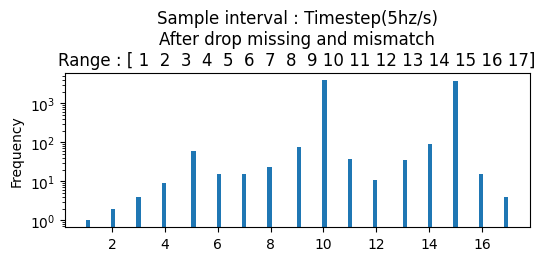

In [23]:
figsize = (6,2)
df_count_timestep = (df_sensor_exploded.groupby(['vehicle_id','event_id'])
                     .id.count().rename('count')
                     .reset_index()
                     ) 
s_interval = np.sort(np.unique(df_count_timestep['count']))
title = f'Sample interval : Timestep(5hz/s)'
title += f'\nAfter drop missing and mismatch'
title += f'\nRange : {s_interval}'
df_count_timestep['count'].plot.hist(figsize=figsize, bins=100, title=title, logy=True);



In [30]:
p_b5 = df_count_timestep.query('count < 5').size / len(df_count_timestep)
p_b10 = df_count_timestep.query('count < 10').size / len(df_count_timestep)

print(f'Timestamps b<5  : {p_b5*100:5.3f}%') 
print(f'Timestamps b<10 : {p_b10*100:5.3f}%') 

Timestamps b<5  : 0.587%
Timestamps b<10 : 7.485%


##### Note : problematic timestamps range
- There are still some problematic data
    - range of timestamps : 1 - 17
    - expected value : 15(3s)
        - Acceptable range : 5(1s) - 20(3s)


In [31]:
con = 'count < 5'
print(df_count_timestep.query(con))
for idx, rows_ in df_count_timestep.query(con).iterrows():
    vehicle_id_, event_id_, count_ = rows_
    # print(f'{idx}, vehicle_id : {vehicle_id_}, event_id : {event_id_}, count : {count_}')
    
    if idx == 7419: break

(df_event.query('vehicle_id == @vehicle_id_ and event_id == @event_id_')
 .loc[:,['gsen_timeTick','gyro_timeTick']].values 
)



      vehicle_id  event_id  count
334   KA01AF2992       335      4
740    KA01AF482       183      3
1003   KA01AF482       448      4
1598   KA01AF482      1045      4
1652   KA01AF482      1099      4
1739   KA01AF482      1187      3
1778   KA01AF482      1226      3
1819   KA01AF482      1268      2
2111   KA01AF482      1563      2
2181   KA01AF482      1634      4
2220   KA01AF482      1673      4
2249   KA01AF482      1702      3
3833  KA51AG8742        52      4
3865  KA51AG8742        84      4
7419  MH04KF8187       336      4
7607  MH04KF8187       528      1


array([[array([41662001, 41662196, 41662397, 41662597, 41662796, 41662996]),
        array([41662196, 41662397, 41662597, 41662796, 41662996])],
       [array([41663196, 41663410, 41663607, 41663796]),
        array([41663196, 41663407, 41663607, 41663796])]], dtype=object)

In [41]:
con = 'count > 15'
print(df_count_timestep.query(con))
for idx, rows_ in df_count_timestep.query(con).iterrows():
    vehicle_id_, event_id_, count_ = rows_
    # print(f'{idx}, vehicle_id : {vehicle_id_}, event_id : {event_id_}, count : {count_}')
    
    if idx == 639: break

(df_event.query('vehicle_id == @vehicle_id_ and event_id == @event_id_')
 .loc[:,['gsen_timeTick','gyro_timeTick']].values 
)

      vehicle_id  event_id  count
639    KA01AF482        80     17
1549   KA01AF482       996     16
1664   KA01AF482      1111     16
1665   KA01AF482      1112     16
3149  KA04MW6569       166     16
4026  KA51AG8742       245     16
4542  KA51AG8742       762     16
4608  KA51AG8742       828     17
4803  KA51AG8742      1023     17
5589  KA51AG8742      1811     16
5795  KA51AG8742      2017     17
5843  KA51AG8742      2065     16
5886  KA51AG8742      2108     16
5906  KA51AG8742      2128     16
5908  KA51AG8742      2130     16
5972  KA51AG8742      2194     16
5996  KA51AG8742      2218     16
6125  KA51AG8742      2347     16
7617  MH04KF8187       538     16


array([[array([43018156, 43018177, 43018383, 43018580, 43018883, 43018977]),
        array([43018156, 43018177, 43018378, 43018578, 43018883, 43018976])],
       [array([43018156, 43018177, 43018383, 43018580, 43018883, 43018977]),
        array([43018156, 43018177, 43018378, 43018578, 43018883, 43018976])],
       [array([43019178, 43019378, 43019602, 43019788, 43019979]),
        array([43019180, 43019377, 43019602, 43019788, 43019981])]],
      dtype=object)

##### Note : <font color=red > Some of the data Timetick has duplicated </font>

##### ~~Find all duplicates first~~
- by timestamp
    -  timestamp -> event_id  
- by gsen & gyro
    - Doesn't seem feasible
    - numpy array can't be compared 

In [42]:
df_dup_ = df_event.query('vehicle_id == @vehicle_id_ and event_id == @event_id_')
df_dup_

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
1427,43953409,KA01AF482,13.099223,78.256380,5.029138,105.973831,1660766526084,"[43018156, 43018177, 43018383, 43018580, 43018...","[43018156, 43018177, 43018378, 43018578, 43018...","[-0.835548996925354, -1.346818447113037, 0.473...","[0.0571136474609375, -0.051116943359375, 0.014...","[-0.23057964444160461, 0.1087217628955841, -0....","[0.0703887939453125, -0.1074981689453125, -0.0...","[-3.2357683181762695, -3.771421432495117, 3.44...","[0.0189666748046875, 0.0156707763671875, 0.018...",2022-08-17 20:02:06.084,80
1428,43953413,KA01AF482,13.099223,78.256380,5.029138,105.973831,1660766527064,"[43018156, 43018177, 43018383, 43018580, 43018...","[43018156, 43018177, 43018378, 43018578, 43018...","[-0.835548996925354, -1.346818447113037, 0.473...","[0.0571136474609375, -0.051116943359375, 0.014...","[-0.23057964444160461, 0.1087217628955841, -0....","[0.0703887939453125, -0.1074981689453125, -0.0...","[-3.2357683181762695, -3.771421432495117, 3.44...","[0.0189666748046875, 0.0156707763671875, 0.018...",2022-08-17 20:02:07.064,80
1429,43953414,KA01AF482,13.099213,78.256424,5.391209,104.085785,1660766527064,"[43019178, 43019378, 43019602, 43019788, 43019...","[43019180, 43019377, 43019602, 43019788, 43019...","[-0.2170635461807251, -0.9632717967033386, -1....","[0.03271484375, 0.025787353515625, 0.008117675...","[-0.46733155846595764, 0.1901770532131195, 0.3...","[0.0442962646484375, 0.0397186279296875, -0.10...","[2.988705635070801, -0.6884565353393555, -3.56...","[0.0359039306640625, 0.0359039306640625, 0.012...",2022-08-17 20:02:07.064,80


In [54]:
g_1 = df_dup_.iloc[0].gsen_X
g_2 =  df_dup_.iloc[1].gsen_X
print(g_1, '\n', g_2 )	
print(g_1 == g_2)
print(df_dup_.duplicated(subset=['gsen_X'], keep=False))


[-0.835549   -1.34681845  0.47327501  0.17217231 -0.56210119 -0.56349373] 
 [-0.835549   -1.34681845  0.47327501  0.17217231 -0.56210119 -0.56349373]
[ True  True  True  True  True  True]
1427    False
1428    False
1429    False
dtype: bool


##### Note 
- The np.ndarray values in the fields cannot be compared correctly by pd.duplicated()

Proportion of timstamp duplicated : 36.69%
Proportion of event_IDs with timestamp duplicates  : 71.68%


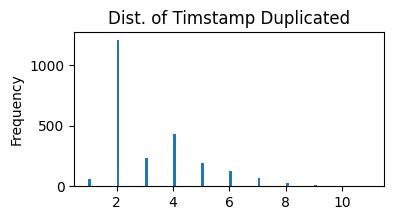

In [80]:

mask_ = df_event.duplicated(subset=['timestamp'], keep=False)
print(f'Proportion of timstamp duplicated : {100*len(df_event[mask_]) / len(df_event):5.2f}%')

df_ts_dup = df_event[mask_]

df_ts_dup_c = df_ts_dup.groupby(['event_id']).timestamp.count().rename('count')

n_event_id_dup = df_ts_dup_c.index.values.size
n_event_id_total = df_event.event_id.unique().size
print(f'Proportion of event_IDs with timestamp duplicates  : {100*n_event_id_dup/n_event_id_total:5.2f}%')
/ df_event.event_id.unique().size


df_ts_dup_c.plot.hist(bins=100, figsize=(4, 2), title='Dist. of Timstamp Duplicated');

# 

##### Note: The percentage of duplicate writes is very high.
- Cannot be restored
- Direct use of these data

## Convert to the required format

### format for ts2vec
- (sample, timestamp, deaturem)

#### Drop timestamp < 10

In [ ]:
index_stamp_reserved = df_count_timestep.query('count >= 10').set_index(['vehicle_id', 'event_id']).index.values
print(len(index_stamp_reserved))
index_stamp_reserved

7972


array([('KA01AF2992', 1), ('KA01AF2992', 2), ('KA01AF2992', 3), ...,
       ('MH04KF8187', 1095), ('MH04KF8187', 1096), ('MH04KF8187', 1097)],
      dtype=object)

In [ ]:
df_ = (df_sensor_exploded.set_index(['vehicle_id', 'event_id'])
       .loc[index_stamp_reserved]
       .reset_index()
       )
df_


,vehicle_id,event_id,id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv
0,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458092,5458091,-0.176844,0.002701,0.358919,-0.008408,0.423661,0.024567,2022-07-27 06:04:39.193
1,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458294,5458294,-0.329202,-0.009552,0.359760,-0.026398,0.588206,0.026062,2022-07-27 06:04:39.193
2,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458492,5458492,-0.477587,-0.017120,0.359269,-0.044296,0.645035,0.024033,2022-07-27 06:04:39.193
3,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458692,5458692,0.128577,0.012604,0.172681,0.011200,-2.081446,0.024353,2022-07-27 06:04:39.193
4,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458893,5458892,-0.198447,-0.003693,0.187229,0.012802,0.825244,0.021576,2022-07-27 06:04:39.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99547,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565018,27565017,2.914450,-0.035446,-1.703996,0.013611,0.351263,0.028122,2022-10-03 01:10:55.906
99548,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565217,27565216,-2.949032,-0.027237,0.460132,0.004761,-2.437326,0.020874,2022-10-03 01:10:55.906
99549,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565416,27565416,1.892698,-0.003052,0.242738,-0.002045,-0.230687,-0.032181,2022-10-03 01:10:55.906
99550,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565617,27565617,-0.870719,-0.003052,0.033652,0.018936,-1.473144,-0.014069,2022-10-03 01:10:55.906


#### Build vehicle_event_id 

In [74]:
df_['v_event_id'] = df_.vehicle_id + '_' + df_.event_id.astype(str)

n_sample =  df_['v_event_id'].nunique()
print('Number of sample : ', n_sample )

df_

Number of sample :  7972


,vehicle_id,event_id,id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,v_event_id
0,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458092,5458091,-0.176844,0.002701,0.358919,-0.008408,0.423661,0.024567,2022-07-27 06:04:39.193,KA01AF2992_1
1,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458294,5458294,-0.329202,-0.009552,0.359760,-0.026398,0.588206,0.026062,2022-07-27 06:04:39.193,KA01AF2992_1
2,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458492,5458492,-0.477587,-0.017120,0.359269,-0.044296,0.645035,0.024033,2022-07-27 06:04:39.193,KA01AF2992_1
3,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458692,5458692,0.128577,0.012604,0.172681,0.011200,-2.081446,0.024353,2022-07-27 06:04:39.193,KA01AF2992_1
4,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458893,5458892,-0.198447,-0.003693,0.187229,0.012802,0.825244,0.021576,2022-07-27 06:04:39.193,KA01AF2992_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99547,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565018,27565017,2.914450,-0.035446,-1.703996,0.013611,0.351263,0.028122,2022-10-03 01:10:55.906,MH04KF8187_1097
99548,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565217,27565216,-2.949032,-0.027237,0.460132,0.004761,-2.437326,0.020874,2022-10-03 01:10:55.906,MH04KF8187_1097
99549,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565416,27565416,1.892698,-0.003052,0.242738,-0.002045,-0.230687,-0.032181,2022-10-03 01:10:55.906,MH04KF8187_1097
99550,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565617,27565617,-0.870719,-0.003052,0.033652,0.018936,-1.473144,-0.014069,2022-10-03 01:10:55.906,MH04KF8187_1097


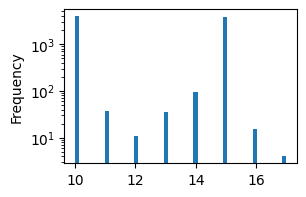

In [67]:
df_.groupby(['v_event_id']).id.count().plot.hist(bins=50, figsize=(3,2), logy=True);

# all timestamp > 10

In [154]:
col_data = ['gsen_X', 'gsen_Y', 'gsen_Z', 'gyro_X', 'gyro_Y', 'gyro_Z']
col_meta = ['vehicle_id', 'event_id', 'id']
col_meta += ['latitude', 'longitude', 'speed', 'heading',]
col_meta += ['timestamp', 'gsen_timeTick', 'gyro_timeTick', 'timestamp_conv']

df_sensor_meta = df_.set_index(['v_event_id'])[col_data + col_meta]

df_sensor_meta 

,gsen_X,gsen_Y,gsen_Z,gyro_X,gyro_Y,gyro_Z,vehicle_id,event_id,id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,timestamp_conv
v_event_id,,,,,,,,,,,,,,,,,
KA01AF2992_1,-0.176844,0.358919,0.423661,0.002701,-0.008408,0.024567,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458092,5458091,2022-07-27 06:04:39.193
KA01AF2992_1,-0.329202,0.359760,0.588206,-0.009552,-0.026398,0.026062,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458294,5458294,2022-07-27 06:04:39.193
KA01AF2992_1,-0.477587,0.359269,0.645035,-0.017120,-0.044296,0.024033,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458492,5458492,2022-07-27 06:04:39.193
KA01AF2992_1,0.128577,0.172681,-2.081446,0.012604,0.011200,0.024353,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458692,5458692,2022-07-27 06:04:39.193
KA01AF2992_1,-0.198447,0.187229,0.825244,-0.003693,0.012802,0.021576,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458893,5458892,2022-07-27 06:04:39.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH04KF8187_1097,2.914450,-1.703996,0.351263,-0.035446,0.013611,0.028122,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565018,27565017,2022-10-03 01:10:55.906
MH04KF8187_1097,-2.949032,0.460132,-2.437326,-0.027237,0.004761,0.020874,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565217,27565216,2022-10-03 01:10:55.906
MH04KF8187_1097,1.892698,0.242738,-0.230687,-0.003052,-0.002045,-0.032181,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565416,27565416,2022-10-03 01:10:55.906


- Load "dora_meta.csv"

In [159]:
save_path = Path('ts2vec/datasets/DORA')
file_ = f'dora_meta'
# df_sensor_meta.to_csv(save_path/f'{file_}.csv',)
df_sensor_meta = pd.read_csv(save_path/f'{file_}.csv', index_col=0)
df_sensor_meta
df_sensor_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99552 entries, KA01AF2992_1 to MH04KF8187_1097
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gsen_X          99552 non-null  float64
 1   gsen_Y          99552 non-null  float64
 2   gsen_Z          99552 non-null  float64
 3   gyro_X          99552 non-null  float64
 4   gyro_Y          99552 non-null  float64
 5   gyro_Z          99552 non-null  float64
 6   vehicle_id      99552 non-null  object 
 7   event_id        99552 non-null  int64  
 8   id              99552 non-null  int64  
 9   latitude        99552 non-null  float64
 10  longitude       99552 non-null  float64
 11  speed           99552 non-null  float64
 12  heading         99552 non-null  float64
 13  timestamp       99552 non-null  int64  
 14  gsen_timeTick   99552 non-null  int64  
 15  gyro_timeTick   99552 non-null  int64  
 16  timestamp_conv  99552 non-null  object 
dtypes: float64(10),

In [172]:
df_sensor_meta.to_feather(save_path/f'{file_}.feather',)

ValueError: feather does not support serializing <class 'pandas.core.indexes.base.Index'> for the index; you can .reset_index() to make the index into column(s)

In [169]:

# Create empty array, fill with NaN
dim = 6 # gsensor x, y, z and  gyro x, y, z 
t_stamp_max = df_sensor_meta.groupby(['v_event_id']).id.count().max()


data_array = np.full((n_sample, t_stamp_max, dim), np.nan) 
print(data_array.shape)
data_array 

(7972, 17, 6)


array([[[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       ...,

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [

- Fill the value according to "v_event_id"

In [161]:
# Fill the value according to "v_event_id"
col_data = ['gsen_X', 'gsen_Y', 'gsen_Z', 'gyro_X', 'gyro_Y', 'gyro_Z']
df_temp = df_sensor_meta[col_data]
df_temp

,gsen_X,gsen_Y,gsen_Z,gyro_X,gyro_Y,gyro_Z
v_event_id,,,,,,
KA01AF2992_1,-0.176844,0.358919,0.423661,0.002701,-0.008408,0.024567
KA01AF2992_1,-0.329202,0.359760,0.588206,-0.009552,-0.026398,0.026062
KA01AF2992_1,-0.477587,0.359269,0.645035,-0.017120,-0.044296,0.024033
KA01AF2992_1,0.128577,0.172681,-2.081446,0.012604,0.011200,0.024353
KA01AF2992_1,-0.198447,0.187229,0.825244,-0.003693,0.012802,0.021576
...,...,...,...,...,...,...
MH04KF8187_1097,2.914450,-1.703996,0.351263,-0.035446,0.013611,0.028122
MH04KF8187_1097,-2.949032,0.460132,-2.437326,-0.027237,0.004761,0.020874
MH04KF8187_1097,1.892698,0.242738,-0.230687,-0.003052,-0.002045,-0.032181


In [170]:
%%time
for idx, v_event_id_ in enumerate(v_event_id):
    v_ = df_temp.loc[v_event_id_ ].values 
    # Since the data is unequal in length
    # It needs to fill the values according to the length of each data
    tstamp_slice = v_.shape[0]
    
    data_array[idx][:tstamp_slice] = v_
    
    info = f'[{idx:5d}|{len(v_event_id):5d} ({100*idx/len(v_event_id):5.2f})%] '
    info += f' | shape : {data_array.shape}, {v_.shape}'
    print(info, end='\r')
    # if idx==100:
    #     break 

CPU times: user 17.1 s, sys: 0 ns, total: 17.1 s (15, 6)
Wall time: 17 s


(7972, 17, 6)

In [145]:
save_path = Path('ts2vec/datasets/DORA')
file_ = f'dora'
file_

'dora'

In [146]:
np.savez_compressed(save_path/f'{file_}.npz', sensor=data_array)
np.load(save_path/f'{file_}.npz',)['sensor']

array([[[-1.76844254e-01,  3.58918786e-01,  4.23661232e-01,
          2.70080566e-03, -8.40759277e-03,  2.45666504e-02],
        [-3.29202056e-01,  3.59760046e-01,  5.88206291e-01,
         -9.55200195e-03, -2.63977051e-02,  2.60620117e-02],
        [-4.77586895e-01,  3.59269023e-01,  6.45034790e-01,
         -1.71203613e-02, -4.42962646e-02,  2.40325928e-02],
        ...,
        [            nan,             nan,             nan,
                     nan,             nan,             nan],
        [            nan,             nan,             nan,
                     nan,             nan,             nan],
        [            nan,             nan,             nan,
                     nan,             nan,             nan]],

       [[ 4.27370518e-01, -3.89060974e-02, -1.67930603e+00,
          1.18560791e-02, -7.76672363e-03,  9.44519043e-03],
        [ 1.05626106e-01,  3.13292384e-01, -3.61956596e-01,
         -2.09503174e-02, -1.75628662e-02,  1.31683350e-02],
        [-4.55256